In [2]:
import sys
sys.path.append("..")
import sensei

In [76]:
import numpy as np
import matplotlib.pyplot as plt

In [251]:
cost_per_cell = 1.
overhead_per_patient = 10000

alpha = 0.05

In [252]:
def cost(n_patients, n_cells_per_patient, cost_per_cell, overhead_per_patient):
    return n_patient * overhead_per_patient + n_cells_per_patient * n_patients * cost_per_cell

In [253]:
def max_n_cells_per_patient(budget, n_patients, cost_per_cell, overhead_per_patient):
    return (budget - n_patients * overhead_per_patient) // (n_patients * cost_per_cell)

## Single condition

In [304]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

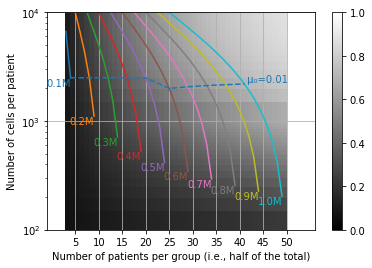

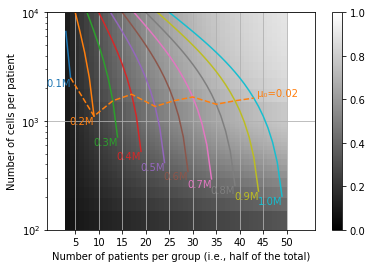

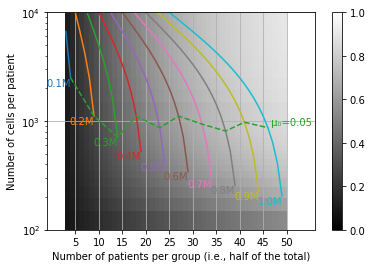

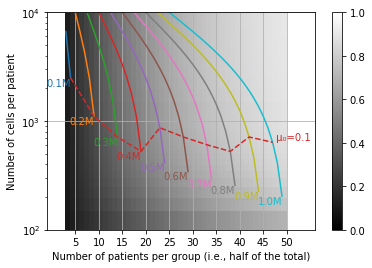

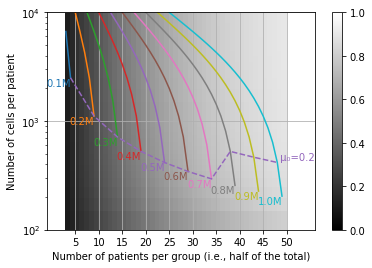

In [305]:
variation_coef = 0.3

cnt = 0

for mu0 in [0.01, 0.02, 0.05, 0.1, 0.2]:
    plt.figure()
    ratio_mu = 1.2
    # delta_mu = 0.025

    # mu1 = mu0 + delta_mu
    mu1 = mu0 * ratio_mu
    sigma0 = variation_coef * mu0
    sigma1 = variation_coef * mu1

    plot_n_patients_per_group = list(range(3, 51))
    plot_n_cells_per_patient = list(range(100, 1000, 50)) + list(range(1000, 10000, 500)) + list(range(10000, 200000, 5000))
    power = []
    for n_patients_per_group in plot_n_patients_per_group:
        power.append([])
        for n_cells_per_patient in plot_n_cells_per_patient:
            power[-1].append(1 - sensei.unpaired.calc_fn_rate(n_patients_per_group, 
                                            n_cells_per_patient, 
                                            [mu0, mu1], 
                                            [sigma0, sigma1], 
                                            alpha, 
                                            "one-sided", 0, 1))


    plot_budgets = range(1_000_000, 5_000_000, 1_000_000)
    plt.pcolor(plot_n_patients_per_group, plot_n_cells_per_patient, np.array(power).T, vmin=0.0, vmax=1.0, cmap="gray")
    plt.yscale("log")
    plt.colorbar()
    plt.clim(0.0, 1.0)

    plot_budgets = range(100_000, 1_000_001, 100_000)
    check_budgets = range(100_000, 1_000_001, 100_000)

    for budget in plot_budgets:
        x = []
        y = []
        max_power = 0.
        for n_patients_per_group in range(3, 51):
            n_patients = n_patients_per_group * 2
            n_cells_per_patient = max_n_cells_per_patient(budget, n_patients, cost_per_cell, overhead_per_patient)
            if n_cells_per_patient > 10:
                x.append(n_patients_per_group)
                y.append(n_cells_per_patient)
                try:
                    power = 1 - sensei.unpaired.calc_fn_rate(n_patients_per_group, 
                                                    n_cells_per_patient, 
                                                    [mu0, mu1], 
                                                    [sigma0, sigma1], 
                                                    alpha, 
                                                    "one-sided", 0, 1)
                    if power > max_power:
                        max_power = power
                        x_star[-1], y_star[-1] = x[-1], y[-1]
                except:
                    pass
        p = plt.plot(x, y)
        plt.text(x[-1], y[-1], str(budget/1000_000) + 'M', horizontalalignment='right', verticalalignment='top', c=p[0].get_color())

    for mu0 in [mu0]:
        variation_coef = 0.3
        ratio_mu = 2
        # delta_mu = 0.025

        # mu1 = mu0 + delta_mu
        mu1 = mu0 * ratio_mu
        sigma0 = variation_coef * mu0
        sigma1 = variation_coef * mu1

        x_star = []
        y_star = []

        for budget in check_budgets:
            x = []
            y = []
            max_power = 0.
            x_star.append(None)
            y_star.append(None)
            for n_patients_per_group in range(3, 51):
                n_patients = n_patients_per_group * 2
                n_cells_per_patient = max_n_cells_per_patient(budget, n_patients, cost_per_cell, overhead_per_patient)
                if n_cells_per_patient > 10:
                    x.append(n_patients_per_group)
                    y.append(n_cells_per_patient)
                    try:
                        power = 1 - sensei.unpaired.calc_fn_rate(n_patients_per_group, 
                                                        n_cells_per_patient, 
                                                        [mu0, mu1], 
                                                        [sigma0, sigma1], 
                                                        alpha, 
                                                        "one-sided", 0, 1)
                        if power > max_power:
                            max_power = power
                            x_star[-1], y_star[-1] = x[-1], y[-1]
                    except:
                        pass
        p = plt.plot(x_star, y_star, '--', color=colors[cnt])
        plt.text(x_star[-1], y_star[-1], ' μ₀=' + str(mu0), 
                 horizontalalignment='left', verticalalignment='bottom', c=p[0].get_color())
    cnt += 1
    plt.yscale("log")
    plt.ylim([100, 10_000])
    plt.xticks(range(5, 51, 5))
    plt.xlim([-1, 56])
    plt.grid()
    plt.xlabel("Number of patients per group (i.e., half of the total)")
    plt.ylabel("Number of cells per patient")

Text(0, 0.5, 'Number of cells per patient')

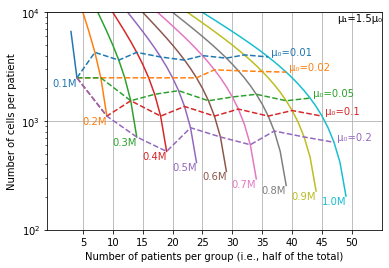

In [381]:
plot_budgets = range(100_000, 1_000_001, 100_000)
check_budgets = range(100_000, 1_000_001, 100_000)

for budget in plot_budgets:
    x = []
    y = []
    max_power = 0.
    for n_patients_per_group in range(3, 51):
        n_patients = n_patients_per_group * 2
        n_cells_per_patient = max_n_cells_per_patient(budget, n_patients, cost_per_cell, overhead_per_patient)
        if n_cells_per_patient > 10:
            x.append(n_patients_per_group)
            y.append(n_cells_per_patient)
            try:
                power = 1 - sensei.unpaired.calc_fn_rate(n_patients_per_group, 
                                                n_cells_per_patient, 
                                                [mu0, mu1], 
                                                [sigma0, sigma1], 
                                                alpha, 
                                                "one-sided", 0, 1)
                if power > max_power:
                    max_power = power
                    x_star[-1], y_star[-1] = x[-1], y[-1]
            except:
                pass
    p = plt.plot(x, y)
    plt.text(x[-1], y[-1], str(budget/1000_000) + 'M', horizontalalignment='right', verticalalignment='top', c=p[0].get_color())

for mu0 in [0.01, 0.02, 0.05, 0.1, 0.2]:
    variation_coef = 0.2
    ratio_mu = 1.5
    # delta_mu = 0.025

    # mu1 = mu0 + delta_mu
    mu1 = mu0 * ratio_mu
    sigma0 = variation_coef * mu0
    sigma1 = variation_coef * mu1
    
    x_star = []
    y_star = []
    
    for budget in check_budgets:
        x = []
        y = []
        max_power = 0.
        x_star.append(None)
        y_star.append(None)
        for n_patients_per_group in range(3, 51):
            n_patients = n_patients_per_group * 2
            n_cells_per_patient = max_n_cells_per_patient(budget, n_patients, cost_per_cell, overhead_per_patient)
            if n_cells_per_patient > 10:
                x.append(n_patients_per_group)
                y.append(n_cells_per_patient)
                try:
                    power = 1 - sensei.unpaired.calc_fn_rate(n_patients_per_group, 
                                                    n_cells_per_patient, 
                                                    [mu0, mu1], 
                                                    [sigma0, sigma1], 
                                                    alpha, 
                                                    "one-sided", 0, 1)
                    if power > max_power:
                        max_power = power
                        x_star[-1], y_star[-1] = x[-1], y[-1]
                except:
                    pass
    p = plt.plot(x_star, y_star, '--')
    plt.text(x_star[-1], y_star[-1], ' μ₀=' + str(mu0), 
             horizontalalignment='left', verticalalignment='bottom', c=p[0].get_color())
    
plt.text(55, 9900, f'μ₁={ratio_mu}μ₀', horizontalalignment='right', verticalalignment='top')
    
plt.yscale("log")
plt.ylim([100, 10_000])
plt.xticks(range(5, 51, 5))
plt.xlim([-1, 55])
plt.grid()
plt.xlabel("Number of patients per group (i.e., half of the total)")
plt.ylabel("Number of cells per patient")

Text(0, 0.5, 'Number of cells per patient')

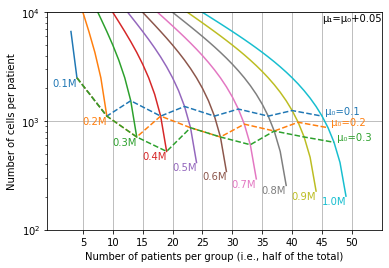

In [379]:
plot_budgets = range(100_000, 1_000_001, 100_000)
check_budgets = range(100_000, 1_000_001, 100_000)

for budget in plot_budgets:
    x = []
    y = []
    max_power = 0.
    for n_patients_per_group in range(3, 51):
        n_patients = n_patients_per_group * 2
        n_cells_per_patient = max_n_cells_per_patient(budget, n_patients, cost_per_cell, overhead_per_patient)
        if n_cells_per_patient > 10:
            x.append(n_patients_per_group)
            y.append(n_cells_per_patient)
            try:
                power = 1 - sensei.unpaired.calc_fn_rate(n_patients_per_group, 
                                                n_cells_per_patient, 
                                                [mu0, mu1], 
                                                [sigma0, sigma1], 
                                                alpha, 
                                                "one-sided", 0, 1)
                if power > max_power:
                    max_power = power
                    x_star[-1], y_star[-1] = x[-1], y[-1]
            except:
                pass
    p = plt.plot(x, y)
    plt.text(x[-1], y[-1], str(budget/1000_000) + 'M', horizontalalignment='right', verticalalignment='top', c=p[0].get_color())

for mu0 in [0.1, 0.2, 0.3]:
    variation_coef = 0.2
    ratio_mu = 1.5
    delta_mu = 0.05

    mu1 = mu0 + delta_mu
    #mu1 = mu0 * ratio_mu
    sigma0 = variation_coef * mu0
    sigma1 = variation_coef * mu1
    
    x_star = []
    y_star = []
    
    for budget in check_budgets:
        x = []
        y = []
        min_fn = 1.
        x_star.append(None)
        y_star.append(None)
        for n_patients_per_group in range(3, 51):
            n_patients = n_patients_per_group * 2
            n_cells_per_patient = max_n_cells_per_patient(budget, n_patients, cost_per_cell, overhead_per_patient)
            if n_cells_per_patient > 10:
                x.append(n_patients_per_group)
                y.append(n_cells_per_patient)
                try:
                    fn = sensei.unpaired.calc_fn_rate(n_patients_per_group, 
                                                    n_cells_per_patient, 
                                                    [mu0, mu1], 
                                                    [sigma0, sigma1], 
                                                    alpha, 
                                                    "one-sided", 0, 1)
                    if fn < min_fn:
                        min_fn = fn
                        x_star[-1], y_star[-1] = x[-1], y[-1]
                except:
                    pass
    p = plt.plot(x_star, y_star, '--')
    plt.text(x_star[-1], y_star[-1], ' μ₀=' + str(mu0), 
             horizontalalignment='left', verticalalignment='bottom', c=p[0].get_color())
    
plt.text(55, 9900, f'μ₁=μ₀+{delta_mu}', horizontalalignment='right', verticalalignment='top')
    
plt.yscale("log")
plt.ylim([100, 10_000])
plt.xticks(range(5, 51, 5))
plt.xlim([-1, 55])
plt.grid()
plt.xlabel("Number of patients per group (i.e., half of the total)")
plt.ylabel("Number of cells per patient")

Text(0, 0.5, 'Number of cells per patient')

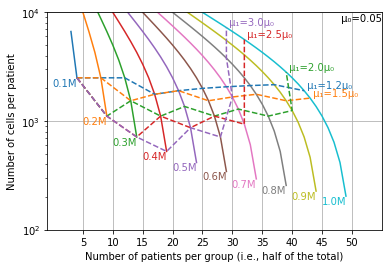

In [353]:
plot_budgets = range(100_000, 1_000_001, 100_000)
check_budgets = range(100_000, 1_000_001, 100_000)

for budget in plot_budgets:
    x = []
    y = []
    max_power = 0.
    for n_patients_per_group in range(3, 51):
        n_patients = n_patients_per_group * 2
        n_cells_per_patient = max_n_cells_per_patient(budget, n_patients, cost_per_cell, overhead_per_patient)
        if n_cells_per_patient > 10:
            x.append(n_patients_per_group)
            y.append(n_cells_per_patient)
            try:
                power = 1 - sensei.unpaired.calc_fn_rate(n_patients_per_group, 
                                                n_cells_per_patient, 
                                                [mu0, mu1], 
                                                [sigma0, sigma1], 
                                                alpha, 
                                                "one-sided", 0, 1)
                if power > max_power:
                    max_power = power
                    x_star[-1], y_star[-1] = x[-1], y[-1]
            except:
                pass
    p = plt.plot(x, y)
    plt.text(x[-1], y[-1], str(budget/1000_000) + 'M', horizontalalignment='right', verticalalignment='top', c=p[0].get_color())

mu0 = 0.05
    
for ratio_mu in [1.2, 1.5, 2.0, 2.5, 3.0]:
    variation_coef = 0.2
    # ratio_mu = 2
    # delta_mu = 0.025

    # mu1 = mu0 + delta_mu
    mu1 = mu0 * ratio_mu
    sigma0 = variation_coef * mu0
    sigma1 = variation_coef * mu1
    
    x_star = []
    y_star = []
    
    for budget in check_budgets:
        x = []
        y = []
        max_power = 0.
        x_star.append(None)
        y_star.append(None)
        for n_patients_per_group in range(3, 51):
            n_patients = n_patients_per_group * 2
            n_cells_per_patient = max_n_cells_per_patient(budget, n_patients, cost_per_cell, overhead_per_patient)
            if n_cells_per_patient > 10:
                x.append(n_patients_per_group)
                y.append(n_cells_per_patient)
                try:
                    power = 1 - sensei.unpaired.calc_fn_rate(n_patients_per_group, 
                                                    n_cells_per_patient, 
                                                    [mu0, mu1], 
                                                    [sigma0, sigma1], 
                                                    alpha, 
                                                    "one-sided", 0, 1)
                    if power > max_power:
                        max_power = power
                        x_star[-1], y_star[-1] = x[-1], y[-1]
                    # print(f'{n_patients_per_group = } {n_cells_per_patient = } {ratio_mu = } {budget = } {power = }')
                except:
                    
                    pass
    p = plt.plot(x_star, y_star, '--')
    plt.text(x_star[-1], y_star[-1], f' μ₁={ratio_mu}μ₀', 
             horizontalalignment='left', verticalalignment='bottom', c=p[0].get_color())

plt.text(55, 9900, f' μ₀={mu0}', horizontalalignment='right', verticalalignment='top')

plt.yscale("log")
plt.ylim([100, 10_000])
plt.xticks(range(5, 51, 5))
plt.xlim([-1, 55])
plt.grid()
plt.xlabel("Number of patients per group (i.e., half of the total)")
plt.ylabel("Number of cells per patient")

n_patients_per_group = 3 n_cells_per_patient = 6666.0 ratio_mu = 1.2 budget = 100000 fn = 0.8278091653037112
n_patients_per_group = 4 n_cells_per_patient = 2500.0 ratio_mu = 1.2 budget = 100000 fn = 0.7641144336886195
n_patients_per_group = 3 n_cells_per_patient = 23333.0 ratio_mu = 1.2 budget = 200000 fn = 0.8231825593355042
n_patients_per_group = 4 n_cells_per_patient = 15000.0 ratio_mu = 1.2 budget = 200000 fn = 0.7420890175468577
n_patients_per_group = 5 n_cells_per_patient = 10000.0 ratio_mu = 1.2 budget = 200000 fn = 0.6726681947459006
n_patients_per_group = 6 n_cells_per_patient = 6666.0 ratio_mu = 1.2 budget = 200000 fn = 0.6138817721577601
n_patients_per_group = 7 n_cells_per_patient = 4285.0 ratio_mu = 1.2 budget = 200000 fn = 0.5664615672909044
n_patients_per_group = 8 n_cells_per_patient = 2500.0 ratio_mu = 1.2 budget = 200000 fn = 0.5354785209877997
n_patients_per_group = 9 n_cells_per_patient = 1111.0 ratio_mu = 1.2 budget = 200000 fn = 0.5450262652211855
n_patients_per_g

n_patients_per_group = 10 n_cells_per_patient = 30000.0 ratio_mu = 1.2 budget = 800000 fn = 0.3939621042531344
n_patients_per_group = 11 n_cells_per_patient = 26363.0 ratio_mu = 1.2 budget = 800000 fn = 0.35442227531416737
n_patients_per_group = 12 n_cells_per_patient = 23333.0 ratio_mu = 1.2 budget = 800000 fn = 0.3186899149208157
n_patients_per_group = 13 n_cells_per_patient = 20769.0 ratio_mu = 1.2 budget = 800000 fn = 0.2864389572590095
n_patients_per_group = 14 n_cells_per_patient = 18571.0 ratio_mu = 1.2 budget = 800000 fn = 0.2573701649312906
n_patients_per_group = 15 n_cells_per_patient = 16666.0 ratio_mu = 1.2 budget = 800000 fn = 0.23120693055016617
n_patients_per_group = 16 n_cells_per_patient = 15000.0 ratio_mu = 1.2 budget = 800000 fn = 0.2076925754657506
n_patients_per_group = 17 n_cells_per_patient = 13529.0 ratio_mu = 1.2 budget = 800000 fn = 0.1865912881212346
n_patients_per_group = 18 n_cells_per_patient = 12222.0 ratio_mu = 1.2 budget = 800000 fn = 0.1676830625978834

n_patients_per_group = 26 n_cells_per_patient = 9230.0 ratio_mu = 1.2 budget = 1000000 fn = 0.06815693737958704
n_patients_per_group = 27 n_cells_per_patient = 8518.0 ratio_mu = 1.2 budget = 1000000 fn = 0.06122977084224712
n_patients_per_group = 28 n_cells_per_patient = 7857.0 ratio_mu = 1.2 budget = 1000000 fn = 0.05507730899517573
n_patients_per_group = 29 n_cells_per_patient = 7241.0 ratio_mu = 1.2 budget = 1000000 fn = 0.049621359117627065
n_patients_per_group = 30 n_cells_per_patient = 6666.0 ratio_mu = 1.2 budget = 1000000 fn = 0.04479066180509107
n_patients_per_group = 31 n_cells_per_patient = 6129.0 ratio_mu = 1.2 budget = 1000000 fn = 0.04052088683232915
n_patients_per_group = 32 n_cells_per_patient = 5625.0 ratio_mu = 1.2 budget = 1000000 fn = 0.03675860859453145
n_patients_per_group = 33 n_cells_per_patient = 5151.0 ratio_mu = 1.2 budget = 1000000 fn = 0.033455394980149135
n_patients_per_group = 34 n_cells_per_patient = 4705.0 ratio_mu = 1.2 budget = 1000000 fn = 0.03056824

n_patients_per_group = 22 n_cells_per_patient = 5909.0 ratio_mu = 1.5 budget = 700000 fn = 2.224694796490631e-05
n_patients_per_group = 23 n_cells_per_patient = 5217.0 ratio_mu = 1.5 budget = 700000 fn = 1.4065745964466052e-05
n_patients_per_group = 24 n_cells_per_patient = 4583.0 ratio_mu = 1.5 budget = 700000 fn = 9.055100924839047e-06
n_patients_per_group = 25 n_cells_per_patient = 4000.0 ratio_mu = 1.5 budget = 700000 fn = 5.9674116252770085e-06
n_patients_per_group = 26 n_cells_per_patient = 3461.0 ratio_mu = 1.5 budget = 700000 fn = 4.0571692191494625e-06
n_patients_per_group = 27 n_cells_per_patient = 2962.0 ratio_mu = 1.5 budget = 700000 fn = 2.876439813472181e-06
n_patients_per_group = 28 n_cells_per_patient = 2500.0 ratio_mu = 1.5 budget = 700000 fn = 2.159938536320466e-06
n_patients_per_group = 29 n_cells_per_patient = 2068.0 ratio_mu = 1.5 budget = 700000 fn = 1.765571260621135e-06
n_patients_per_group = 30 n_cells_per_patient = 1666.0 ratio_mu = 1.5 budget = 700000 fn = 1.

n_patients_per_group = 37 n_cells_per_patient = 3513.0 ratio_mu = 1.5 budget = 1000000 fn = 1.2219498288021176e-08
n_patients_per_group = 38 n_cells_per_patient = 3157.0 ratio_mu = 1.5 budget = 1000000 fn = 8.47247843832766e-09
n_patients_per_group = 39 n_cells_per_patient = 2820.0 ratio_mu = 1.5 budget = 1000000 fn = 6.084386702821696e-09
n_patients_per_group = 40 n_cells_per_patient = 2500.0 ratio_mu = 1.5 budget = 1000000 fn = 4.5700694452315845e-09
n_patients_per_group = 41 n_cells_per_patient = 2195.0 ratio_mu = 1.5 budget = 1000000 fn = 3.640867951724078e-09
n_patients_per_group = 42 n_cells_per_patient = 1904.0 ratio_mu = 1.5 budget = 1000000 fn = 3.1366753934895056e-09
n_patients_per_group = 43 n_cells_per_patient = 1627.0 ratio_mu = 1.5 budget = 1000000 fn = 3.0021056306110084e-09
n_patients_per_group = 44 n_cells_per_patient = 1363.0 ratio_mu = 1.5 budget = 1000000 fn = 3.3319316423418885e-09
n_patients_per_group = 45 n_cells_per_patient = 1111.0 ratio_mu = 1.5 budget = 10000

n_patients_per_group = 17 n_cells_per_patient = 7647.0 ratio_mu = 2.0 budget = 600000 fn = 7.363500128344045e-08
n_patients_per_group = 18 n_cells_per_patient = 6666.0 ratio_mu = 2.0 budget = 600000 fn = 2.8284022457599707e-08
n_patients_per_group = 19 n_cells_per_patient = 5789.0 ratio_mu = 2.0 budget = 600000 fn = 1.1003896052706937e-08
n_patients_per_group = 20 n_cells_per_patient = 5000.0 ratio_mu = 2.0 budget = 600000 fn = 4.353471421033509e-09
n_patients_per_group = 21 n_cells_per_patient = 4285.0 ratio_mu = 2.0 budget = 600000 fn = 1.761870894017262e-09
n_patients_per_group = 22 n_cells_per_patient = 3636.0 ratio_mu = 2.0 budget = 600000 fn = 7.354057463947123e-10
n_patients_per_group = 23 n_cells_per_patient = 3043.0 ratio_mu = 2.0 budget = 600000 fn = 3.2085395807382593e-10
n_patients_per_group = 24 n_cells_per_patient = 2500.0 ratio_mu = 2.0 budget = 600000 fn = 1.4945127442902036e-10
n_patients_per_group = 25 n_cells_per_patient = 2000.0 ratio_mu = 2.0 budget = 600000 fn = 7

n_patients_per_group = 27 n_cells_per_patient = 6666.0 ratio_mu = 2.0 budget = 900000 fn = 3.31257802965719e-12
n_patients_per_group = 28 n_cells_per_patient = 6071.0 ratio_mu = 2.0 budget = 900000 fn = 1.2743114583999215e-12
n_patients_per_group = 29 n_cells_per_patient = 5517.0 ratio_mu = 2.0 budget = 900000 fn = 4.950721448962991e-13
n_patients_per_group = 30 n_cells_per_patient = 5000.0 ratio_mu = 2.0 budget = 900000 fn = 1.9464380143206783e-13
n_patients_per_group = 31 n_cells_per_patient = 4516.0 ratio_mu = 2.0 budget = 900000 fn = 7.765580448666126e-14
n_patients_per_group = 32 n_cells_per_patient = 4062.0 ratio_mu = 2.0 budget = 900000 fn = 3.154764358483296e-14
n_patients_per_group = 33 n_cells_per_patient = 3636.0 ratio_mu = 2.0 budget = 900000 fn = 1.3107113895663068e-14
n_patients_per_group = 34 n_cells_per_patient = 3235.0 ratio_mu = 2.0 budget = 900000 fn = 5.604027849142229e-15
n_patients_per_group = 35 n_cells_per_patient = 2857.0 ratio_mu = 2.0 budget = 900000 fn = 2.4

n_patients_per_group = 7 n_cells_per_patient = 32857.0 ratio_mu = 2.5 budget = 600000 fn = 0.00030738729025622135
n_patients_per_group = 8 n_cells_per_patient = 27500.0 ratio_mu = 2.5 budget = 600000 fn = 9.021317014850826e-05
n_patients_per_group = 9 n_cells_per_patient = 23333.0 ratio_mu = 2.5 budget = 600000 fn = 2.666777455015831e-05
n_patients_per_group = 10 n_cells_per_patient = 20000.0 ratio_mu = 2.5 budget = 600000 fn = 7.923467311143344e-06
n_patients_per_group = 11 n_cells_per_patient = 17272.0 ratio_mu = 2.5 budget = 600000 fn = 2.363656032366797e-06
n_patients_per_group = 12 n_cells_per_patient = 15000.0 ratio_mu = 2.5 budget = 600000 fn = 7.07571464584746e-07
n_patients_per_group = 13 n_cells_per_patient = 13076.0 ratio_mu = 2.5 budget = 600000 fn = 2.1253110149623654e-07
n_patients_per_group = 14 n_cells_per_patient = 11428.0 ratio_mu = 2.5 budget = 600000 fn = 6.406177901602616e-08
n_patients_per_group = 15 n_cells_per_patient = 10000.0 ratio_mu = 2.5 budget = 600000 fn 

n_patients_per_group = 26 n_cells_per_patient = 7307.0 ratio_mu = 2.5 budget = 900000 fn = 3.37415908634175e-14
n_patients_per_group = 27 n_cells_per_patient = 6666.0 ratio_mu = 2.5 budget = 900000 fn = 1.0350091383848885e-14
n_patients_per_group = 28 n_cells_per_patient = 6071.0 ratio_mu = 2.5 budget = 900000 fn = 3.1922591468364695e-15
n_patients_per_group = 29 n_cells_per_patient = 5517.0 ratio_mu = 2.5 budget = 900000 fn = 9.910931764439228e-16
n_patients_per_group = 30 n_cells_per_patient = 5000.0 ratio_mu = 2.5 budget = 900000 fn = 3.1016928006434043e-16
n_patients_per_group = 31 n_cells_per_patient = 4516.0 ratio_mu = 2.5 budget = 900000 fn = 9.802916498030425e-17
n_patients_per_group = 32 n_cells_per_patient = 4062.0 ratio_mu = 2.5 budget = 900000 fn = 3.136260249421931e-17
n_patients_per_group = 33 n_cells_per_patient = 3636.0 ratio_mu = 2.5 budget = 900000 fn = 1.0187717057938993e-17
n_patients_per_group = 34 n_cells_per_patient = 3235.0 ratio_mu = 2.5 budget = 900000 fn = 3.

n_patients_per_group = 5 n_cells_per_patient = 60000.0 ratio_mu = 3.0 budget = 700000 fn = 0.0021280031297101058
n_patients_per_group = 6 n_cells_per_patient = 48333.0 ratio_mu = 3.0 budget = 700000 fn = 0.0005442400076311204
n_patients_per_group = 7 n_cells_per_patient = 40000.0 ratio_mu = 3.0 budget = 700000 fn = 0.00014211798149310823
n_patients_per_group = 8 n_cells_per_patient = 33750.0 ratio_mu = 3.0 budget = 700000 fn = 3.754686657321098e-05
n_patients_per_group = 9 n_cells_per_patient = 28888.0 ratio_mu = 3.0 budget = 700000 fn = 9.992334292893028e-06
n_patients_per_group = 10 n_cells_per_patient = 25000.0 ratio_mu = 3.0 budget = 700000 fn = 2.6724678094050688e-06
n_patients_per_group = 11 n_cells_per_patient = 21818.0 ratio_mu = 3.0 budget = 700000 fn = 7.173487824299119e-07
n_patients_per_group = 12 n_cells_per_patient = 19166.0 ratio_mu = 3.0 budget = 700000 fn = 1.9309835725265214e-07
n_patients_per_group = 13 n_cells_per_patient = 16923.0 ratio_mu = 3.0 budget = 700000 fn 

n_patients_per_group = 27 n_cells_per_patient = 8518.0 ratio_mu = 3.0 budget = 1000000 fn = 5.860790193842896e-16
n_patients_per_group = 28 n_cells_per_patient = 7857.0 ratio_mu = 3.0 budget = 1000000 fn = 1.6038506287002547e-16
n_patients_per_group = 29 n_cells_per_patient = 7241.0 ratio_mu = 3.0 budget = 1000000 fn = 4.3997442261937567e-17
n_patients_per_group = 30 n_cells_per_patient = 6666.0 ratio_mu = 3.0 budget = 1000000 fn = 1.2103656040846598e-17
n_patients_per_group = 31 n_cells_per_patient = 6129.0 ratio_mu = 3.0 budget = 1000000 fn = 3.3405986417180294e-18
n_patients_per_group = 32 n_cells_per_patient = 5625.0 ratio_mu = 3.0 budget = 1000000 fn = 9.25630371320492e-19
n_patients_per_group = 33 n_cells_per_patient = 5151.0 ratio_mu = 3.0 budget = 1000000 fn = 2.576828503641389e-19
n_patients_per_group = 34 n_cells_per_patient = 4705.0 ratio_mu = 3.0 budget = 1000000 fn = 7.213679145544045e-20
n_patients_per_group = 35 n_cells_per_patient = 4285.0 ratio_mu = 3.0 budget = 100000

Text(0, 0.5, 'Number of cells per patient')

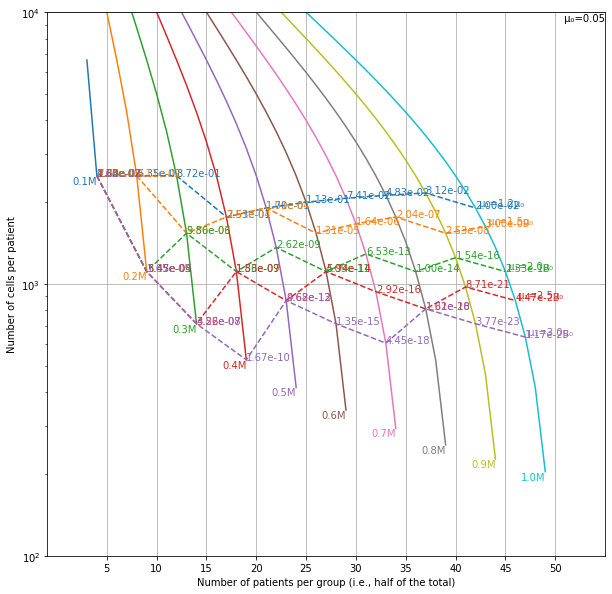

In [360]:
plot_budgets = range(100_000, 1_000_001, 100_000)
check_budgets = range(100_000, 1_000_001, 100_000)
plt.figure(figsize=(10, 10))
for budget in plot_budgets:
    x = []
    y = []
    max_power = 0.
    for n_patients_per_group in range(3, 51):
        n_patients = n_patients_per_group * 2
        n_cells_per_patient = max_n_cells_per_patient(budget, n_patients, cost_per_cell, overhead_per_patient)
        if n_cells_per_patient > 10:
            x.append(n_patients_per_group)
            y.append(n_cells_per_patient)
            try:
                power = 1 - sensei.unpaired.calc_fn_rate(n_patients_per_group, 
                                                n_cells_per_patient, 
                                                [mu0, mu1], 
                                                [sigma0, sigma1], 
                                                alpha, 
                                                "one-sided", 0, 1)
                if power > max_power:
                    max_power = power
                    x_star[-1], y_star[-1] = x[-1], y[-1]
            except:
                pass
    p = plt.plot(x, y)
    plt.text(x[-1], y[-1], str(budget/1000_000) + 'M', horizontalalignment='right', verticalalignment='top', c=p[0].get_color())

mu0 = 0.05
    
for ratio_mu in [1.2, 1.5, 2.0, 2.5, 3.0]:
    variation_coef = 0.2
    # ratio_mu = 2
    # delta_mu = 0.025

    # mu1 = mu0 + delta_mu
    mu1 = mu0 * ratio_mu
    sigma0 = variation_coef * mu0
    sigma1 = variation_coef * mu1
    
    x_star = []
    y_star = []
    z_star = []
    for budget in check_budgets:
        x = []
        y = []
        min_fn = 1.
        x_star.append(None)
        y_star.append(None)
        z_star.append(None)
        for n_patients_per_group in range(3, 51):
            n_patients = n_patients_per_group * 2
            n_cells_per_patient = max_n_cells_per_patient(budget, n_patients, cost_per_cell, overhead_per_patient)
            if n_cells_per_patient > 10:
                x.append(n_patients_per_group)
                y.append(n_cells_per_patient)
                try:
                    fn = sensei.unpaired.calc_fn_rate(n_patients_per_group, 
                                                    n_cells_per_patient, 
                                                    [mu0, mu1], 
                                                    [sigma0, sigma1], 
                                                    alpha, 
                                                    "one-sided", 0, 1)
                    if fn < min_fn:
                        min_fn = fn
                        x_star[-1], y_star[-1] = x[-1], y[-1]
                        z_star[-1] = fn
                    print(f'{n_patients_per_group = } {n_cells_per_patient = } {ratio_mu = } {budget = } {fn = }')
                except:
                    pass
    p = plt.plot(x_star, y_star, '--')
    plt.text(x_star[-1], y_star[-1], f' μ₁={ratio_mu}μ₀', 
             horizontalalignment='left', verticalalignment='bottom', c=p[0].get_color())
    for xyz_star in zip(x_star, y_star, z_star):
        plt.text(xyz_star[0], xyz_star[1], f'{xyz_star[2]:.2e}', c=p[0].get_color())
    
plt.text(55, 9900, f' μ₀={mu0}', horizontalalignment='right', verticalalignment='top')

plt.yscale("log")
plt.ylim([100, 10_000])
plt.xticks(range(5, 51, 5))
plt.xlim([-1, 55])
plt.grid()
plt.xlabel("Number of patients per group (i.e., half of the total)")
plt.ylabel("Number of cells per patient")

Text(0, 0.5, 'Number of cells per patient')

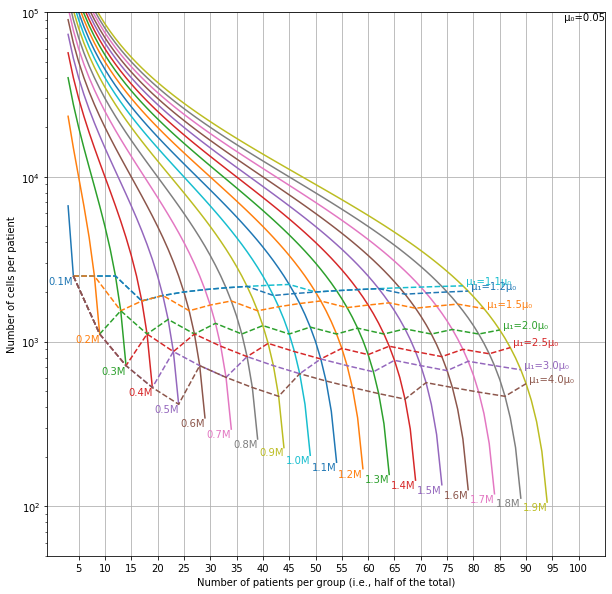

In [366]:
plot_budgets = list(range(100_000, 2_000_000, 100_000))
check_budgets = plot_budgets

plt.figure(figsize=(10, 10))

for budget in plot_budgets:
    x = []
    y = []
    max_power = 0.
    for n_patients_per_group in range(3, 101):
        n_patients = n_patients_per_group * 2
        n_cells_per_patient = max_n_cells_per_patient(budget, n_patients, cost_per_cell, overhead_per_patient)
        if n_cells_per_patient > 10:
            x.append(n_patients_per_group)
            y.append(n_cells_per_patient)
            try:
                power = 1 - sensei.unpaired.calc_fn_rate(n_patients_per_group, 
                                                n_cells_per_patient, 
                                                [mu0, mu1], 
                                                [sigma0, sigma1], 
                                                alpha, 
                                                "one-sided", 0, 1)
                if power > max_power:
                    max_power = power
                    x_star[-1], y_star[-1] = x[-1], y[-1]
            except:
                pass
    p = plt.plot(x, y)
    plt.text(x[-1], y[-1], str(budget/1000_000) + 'M', horizontalalignment='right', verticalalignment='top', c=p[0].get_color())

mu0 = 0.05
    
for ratio_mu in [1.1, 1.2, 1.5, 2.0, 2.5, 3.0, 4.0]:
    variation_coef = 0.2
    # ratio_mu = 2
    # delta_mu = 0.025

    # mu1 = mu0 + delta_mu
    mu1 = mu0 * ratio_mu
    sigma0 = variation_coef * mu0
    sigma1 = variation_coef * mu1
    
    x_star = []
    y_star = []
    
    for budget in check_budgets:
        x = []
        y = []
        min_fn = 100.
        x_star.append(None)
        y_star.append(None)
        for n_patients_per_group in range(3, 101):
            n_patients = n_patients_per_group * 2
            n_cells_per_patient = max_n_cells_per_patient(budget, n_patients, cost_per_cell, overhead_per_patient)
            if n_cells_per_patient > 10:
                x.append(n_patients_per_group)
                y.append(n_cells_per_patient)
                try:
                    fn = sensei.unpaired.calc_fn_rate(n_patients_per_group, 
                                                    n_cells_per_patient, 
                                                    [mu0, mu1], 
                                                    [sigma0, sigma1], 
                                                    alpha, 
                                                    "one-sided", 0, 1)
                    if fn <= min_fn:
                        min_fn = fn
                        x_star[-1], y_star[-1] = x[-1], y[-1]
                    # print(f'{n_patients_per_group = } {n_cells_per_patient = } {ratio_mu = } {budget = } {power = }')
                except:
                    
                    pass
    p = plt.plot(x_star, y_star, '--')
    plt.text(x_star[-1], y_star[-1], f' μ₁={ratio_mu}μ₀', 
             horizontalalignment='left', verticalalignment='bottom', c=p[0].get_color())

plt.text(105, 100000, f' μ₀={mu0}', horizontalalignment='right', verticalalignment='top')

plt.yscale("log")
plt.ylim([50, 100_000])
plt.xticks(range(5, 101, 5))
plt.xlim([-1, 105])
plt.grid()
plt.xlabel("Number of patients per group (i.e., half of the total)")
plt.ylabel("Number of cells per patient")

Text(0, 0.5, 'Number of cells per patient')

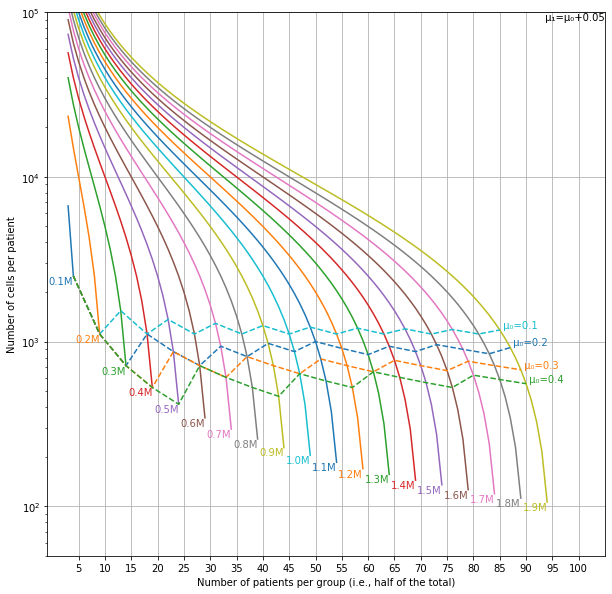

In [373]:
plot_budgets = list(range(100_000, 2_000_000, 100_000))
check_budgets = plot_budgets

plt.figure(figsize=(10, 10))

for budget in plot_budgets:
    x = []
    y = []
    max_power = 0.
    for n_patients_per_group in range(3, 101):
        n_patients = n_patients_per_group * 2
        n_cells_per_patient = max_n_cells_per_patient(budget, n_patients, cost_per_cell, overhead_per_patient)
        if n_cells_per_patient > 10:
            x.append(n_patients_per_group)
            y.append(n_cells_per_patient)
            try:
                power = 1 - sensei.unpaired.calc_fn_rate(n_patients_per_group, 
                                                n_cells_per_patient, 
                                                [mu0, mu1], 
                                                [sigma0, sigma1], 
                                                alpha, 
                                                "one-sided", 0, 1)
                if power > max_power:
                    max_power = power
                    x_star[-1], y_star[-1] = x[-1], y[-1]
            except:
                pass
    p = plt.plot(x, y)
    plt.text(x[-1], y[-1], str(budget/1000_000) + 'M', horizontalalignment='right', verticalalignment='top', c=p[0].get_color())

#mu0 = 0.05
    
for mu0 in [0.1, 0.2, 0.3, 0.4]:
    variation_coef = 0.2
    # ratio_mu = 2
    delta_mu = 0.05

    mu1 = mu0 + delta_mu
    # mu1 = mu0 * ratio_mu
    sigma0 = variation_coef * mu0
    sigma1 = variation_coef * mu1
    
    x_star = []
    y_star = []
    
    for budget in check_budgets:
        x = []
        y = []
        min_fn = 100.
        x_star.append(None)
        y_star.append(None)
        for n_patients_per_group in range(3, 101):
            n_patients = n_patients_per_group * 2
            n_cells_per_patient = max_n_cells_per_patient(budget, n_patients, cost_per_cell, overhead_per_patient)
            if n_cells_per_patient > 10:
                x.append(n_patients_per_group)
                y.append(n_cells_per_patient)
                try:
                    fn = sensei.unpaired.calc_fn_rate(n_patients_per_group, 
                                                    n_cells_per_patient, 
                                                    [mu0, mu1], 
                                                    [sigma0, sigma1], 
                                                    alpha, 
                                                    "one-sided", 0, 1)
                    if fn <= min_fn:
                        min_fn = fn
                        x_star[-1], y_star[-1] = x[-1], y[-1]
                    # print(f'{n_patients_per_group = } {n_cells_per_patient = } {ratio_mu = } {budget = } {power = }')
                except:
                    
                    pass
    p = plt.plot(x_star, y_star, '--')
    plt.text(x_star[-1], y_star[-1], f' μ₀={mu0}', 
             horizontalalignment='left', verticalalignment='bottom', c=p[0].get_color())

plt.text(105, 100000, f' μ₁=μ₀+{delta_mu}', horizontalalignment='right', verticalalignment='top')

plt.yscale("log")
plt.ylim([50, 100_000])
plt.xticks(range(5, 101, 5))
plt.xlim([-1, 105])
plt.grid()
plt.xlabel("Number of patients per group (i.e., half of the total)")
plt.ylabel("Number of cells per patient")